### Erreur en position
Pour chaque pos réelle prendre la plus proche pour l'association

histogramme pour un niveau de bruit donné
abscisse = erreur en position
ordonnée = densité

In [1]:
import numpy as np
from numba import njit
from csc.atoms import *
from csc.dictionary import *
import matplotlib.pyplot as plt

# atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


#### Position matching error example

In [2]:
atoms_dict = [{'x':11, 'b':0.01, 'y':0.02, 's':1},{"x":20, "b":0.01, "y":0.02, "s":1}]
recov_atoms_dict = [{'x':10, 'b':0.01, 'y':0.02, 's':1},{"x":22, "b":0.01, "y":0.02, 's':1}]
pos_error = dictionary.atomsDictPositionMatchingErrors(atoms_dict, recov_atoms_dict)
print("Erreur en position : ", pos_error)

Erreur en position :  [-1, 2]


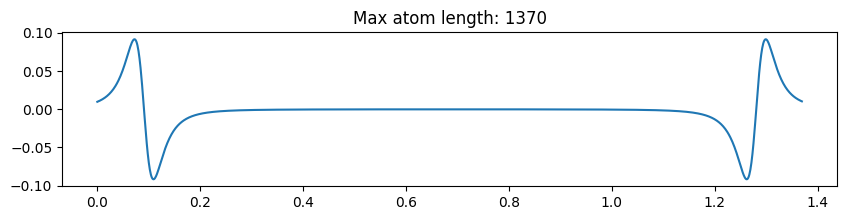

In [3]:
combinations = list(product(b_values, y_values, s_values))
# Create ZSAtom objects for each combination
zs_atoms = [ZSAtom(b, y, s) for b, y, s in combinations]
max_len_idx = np.argmax([len(atom) for atom in zs_atoms])
max_atom = zs_atoms[max_len_idx]
x, s = max_atom.getPlots()

fig, axs = plt.subplots(1, 1, figsize=(10, 2))
axs.plot(x, s)
axs.set_title('Max atom length: {}'.format(len(max_atom)))
plt.show()

In [4]:
dictionary.enable_timing()
positionErrorCounter = dictionary.ompPositionErrorBatch(
    sparsity_level=3,
    noise_level=0.005,
    batch_size=3,
    verbose=True
)

~~~OMP Test Batch of 10 signals ~~~
========= Signal 1/10 =========
OMP 1/3
OMP 2/3
OMP 3/3
Temps d'exécution de omp: 8.255903 secondes.
========= Signal 2/10 =========
OMP 1/3
OMP 2/3
OMP 3/3
Temps d'exécution de omp: 7.203929 secondes.
========= Signal 3/10 =========
OMP 1/3
OMP 2/3
OMP 3/3
Temps d'exécution de omp: 7.178658 secondes.
========= Signal 4/10 =========
OMP 1/3
OMP 2/3
OMP 3/3
Temps d'exécution de omp: 8.824431 secondes.
========= Signal 5/10 =========
OMP 1/3
OMP 2/3
OMP 3/3
Temps d'exécution de omp: 9.154974 secondes.
========= Signal 6/10 =========
OMP 1/3
OMP 2/3
OMP 3/3
Temps d'exécution de omp: 14.504830 secondes.
========= Signal 7/10 =========
OMP 1/3
OMP 2/3
OMP 3/3
Temps d'exécution de omp: 9.988045 secondes.
========= Signal 8/10 =========
OMP 1/3
OMP 2/3
OMP 3/3
Temps d'exécution de omp: 10.652058 secondes.
========= Signal 9/10 =========
OMP 1/3
OMP 2/3
OMP 3/3
Temps d'exécution de omp: 13.310219 secondes.
========= Signal 10/10 =========
OMP 1/3
OMP 2/3
OMP

In [6]:
perf = dictionary.performance_log
sorted_perf = [(key, np.mean(perf[key])) for key in perf.keys()]
sorted_perf.sort(key=lambda x: x[1])
for i, p in enumerate(sorted_perf) :
    print('{} : {} in {:.2f}s'.format(i+1, p[0], p[1]))

1 : atomsDictPositionMatchingErrors in 0.00s
2 : computeConvolutions in 0.29s
3 : getMaskedConvOperator in 0.30s
4 : computeCorrelations in 0.48s
5 : omp in 10.00s
6 : ompTestBatch in 100.00s
7 : ompPositionErrorBatch in 100.06s


In [2]:
sparsityLevel = 3
signalLength = dictionary.getAtomsLength()*2
noiseLevels = np.concatenate((np.arange(0.0, 0.11, 0.01), np.arange(0.12, 0.22, 0.02)))
len(noiseLevels)

NameError: name 'dictionary' is not defined

In [ ]:
fig, axs = plt.subplots(len(noiseLevels), 1, figsize=(10, 3*len(noiseLevels)), sharex=True)
x = np.linspace(0, 1, signalLength)
for i, noise in enumerate(noiseLevels) :
    signal, _ = dictionary.generateTestSignal(signalLength ,sparsityLevel, noise)
    axs[i].plot(x, signal)
    axs[i].set_title('noise level = {}'.format(noise))

plt.show()